# FAST-ODD - Multirotor Design

FAST is a framework for performing rapid Overall Aircraft Design. The computational core of FAST is based on the  [OpenMDAO framework](https://openmdao.org/).

FAST-ODD is the drone declination of FAST.

## 1. Setting up and analyzing the initial problem

To organize our work, we propose to use two user folders `data/` and `workdir/`. For instance, in `data/` we store a XML file which describes a multirotor drone. In `workdir/`, we store files generated or modified by FAST-OAD.

In [1]:
import os.path as pth
import openmdao.api as om
import logging
import shutil
import fastoad.api as oad
from time import time
from utils.drivers.cmaes_driver import CMAESDriver
# from nrel_openmdao_extensions.nlopt_driver import NLoptDriver
import cma
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=16,8
plt.rcParams.update({'font.size': 13})

DATA_FOLDER_PATH = 'data'
WORK_FOLDER_PATH = 'workdir'

# For having log messages display on screen
logging.basicConfig(level=logging.INFO, format='%(levelname)-8s: %(message)s')

# For using all screen width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In the configuration file, we have specified an input file name 'problem_inputs.xml'. We can ask FAST-OAD to generate the inputs of the default model with the reference parameters from my_ref_values.xml as default values:

In [2]:
CONFIGURATION_FILE = pth.join(DATA_FOLDER_PATH, 'multirotor_mdo.yaml')
SOURCE_FILE = pth.join(WORK_FOLDER_PATH, 'problem_inputs.xml')
oad.generate_inputs(CONFIGURATION_FILE, SOURCE_FILE, overwrite=True)

FileNotFoundError: [Errno 2] No such file or directory: '/home/sdelbecq/PycharmProjects/FAST-ODD/data/multirotor_mdo.yaml'

Another useful feature is the [N2 diagram](http://openmdao.org/twodocs/versions/latest/basic_guide/make_n2.html) visualization available in OpenMDAO to see the structure of the model:

In [4]:
N2_FILE = pth.join(WORK_FOLDER_PATH, 'n2.html')
oad.write_n2(CONFIGURATION_FILE, N2_FILE, overwrite=True)
from IPython.display import IFrame
IFrame(src=N2_FILE, width='100%', height='500px')

INFO    : N2 diagram written in D:\THESE\Tools\FAST-ODD\workdir\n2.html


## 2. Inputs

The problem inputs file contains 4 groups:
- specifications: these are the top-level requirements such as maximum thrust-to-weight ratio and the design mission definition (hover duration, climb height, range and maximum payload);
- data: everything related to the components and system architecture.
- mission: parameters related to the missions definition.
- addons: here you will find parameters which are specific to an application.

In [5]:
INPUT_FILE = pth.join(WORK_FOLDER_PATH, 'problem_inputs.xml')
oad.variable_viewer(INPUT_FILE)

## 3. Multirotor MDO

In [6]:
optim_problem = oad.optimize_problem(CONFIGURATION_FILE, overwrite=True)

INFO    : Loaded variable descriptions in D:\THESE\Tools\FAST-ODD\data\../models
INFO    : Loaded variable descriptions in D:\THESE\Tools\FAST-ODD\data\../models
INFO    : Loading bundles from D:\THESE\Tools\FAST-ODD\data\../models
INFO    : Installed bundle models (ID 177 )
INFO    : Loading bundles from D:\THESE\Tools\FAST-ODD\data\../models/Energy_source
INFO    : Installed bundle Energy_source (ID 178 )
INFO    : Installed bundle Energy_source.energy_source (ID 179 )
INFO    : Loading bundles from D:\THESE\Tools\FAST-ODD\data\../models/ESC
INFO    : Installed bundle ESC (ID 180 )
INFO    : Installed bundle ESC.esc (ID 181 )
INFO    : Loading bundles from D:\THESE\Tools\FAST-ODD\data\../models/Missions
INFO    : Installed bundle Missions.mission_concordia (ID 183 )
INFO    : Installed bundle Missions.mission_design (ID 184 )
INFO    : Installed bundle Missions (ID 182 )
INFO    : Loading bundles from D:\THESE\Tools\FAST-ODD\data\../models/Motor
INFO    : Installed bundle Motor.motor

Optimization terminated successfully    (Exit mode 0)
            Current function value: [13.60477634]
            Iterations: 13
            Function evaluations: 31
            Gradient evaluations: 13
Optimization Complete
-----------------------------------


INFO    : Computation finished after 2.85 seconds
INFO    : Problem outputs written in D:\THESE\Tools\FAST-ODD\workdir\problem_outputs_continuous.xml


In [7]:
OUTPUT_FILE = pth.join(WORK_FOLDER_PATH, 'problem_outputs_continuous.xml')
oad.optimization_viewer(CONFIGURATION_FILE)

In [56]:
oad.variable_viewer(OUTPUT_FILE)

## 4. Analysis and plots

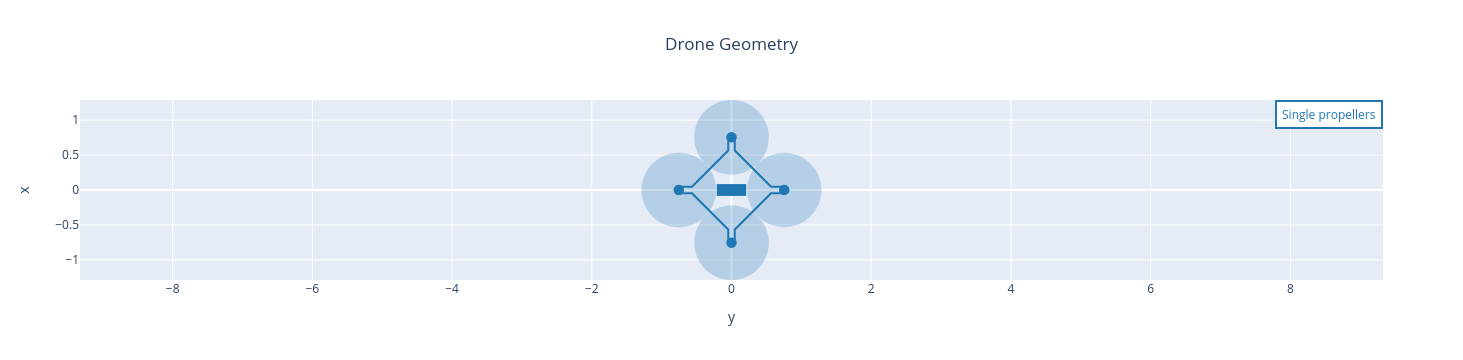

In [39]:
from utils.postprocessing.analysis_and_plots import *

fig = drone_geometry_plot(OUTPUT_FILE, name='Drone MDO')
fig.show()

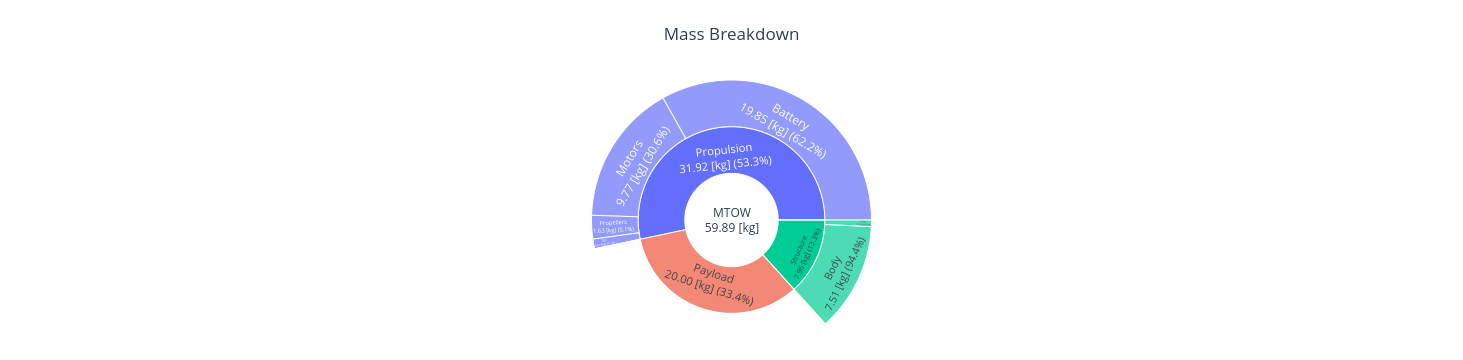

In [20]:
fig = mass_breakdown_sun_plot_drone(OUTPUT_FILE)
fig.show()

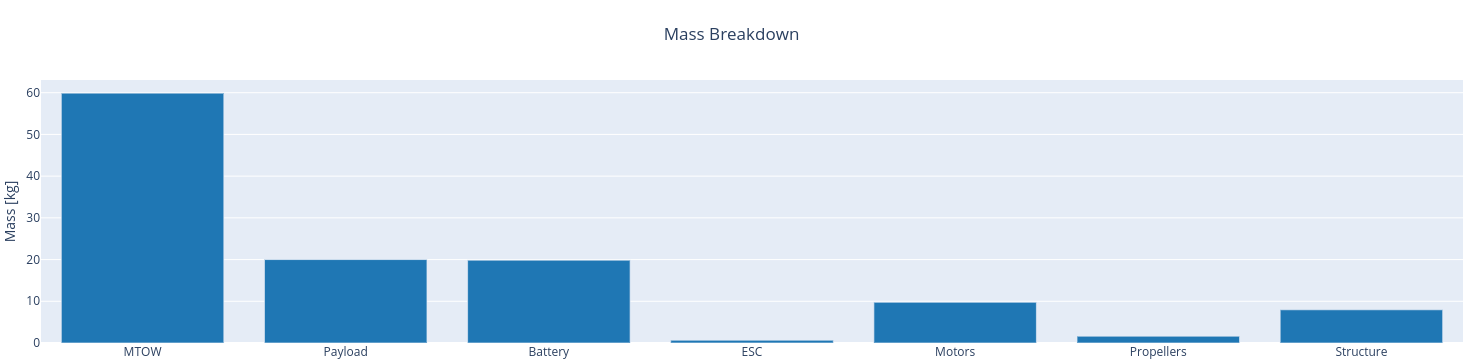

In [22]:
fig = mass_breakdown_bar_plot_drone(OUTPUT_FILE, name='Drone MDO')
fig.show()
plotly.io.write_image(fig, 'output_file.pdf', format='pdf')

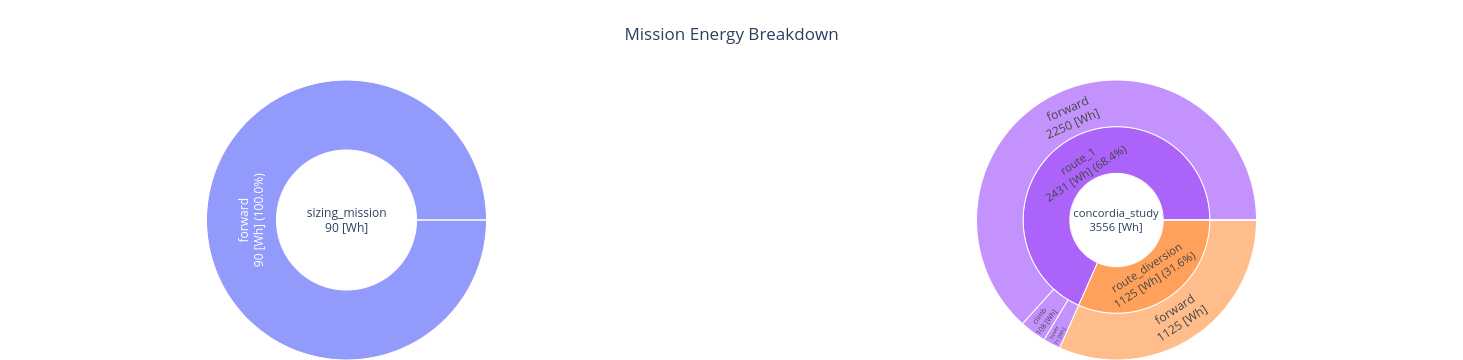

In [24]:
# Energy breakdown
fig = energy_breakdown_sun_plot_drone(OUTPUT_FILE, mission_name='sizing_mission')
energy_breakdown_sun_plot_drone(OUTPUT_FILE, mission_name='concordia_study', fig=fig)
fig.show()